In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Contours

Introduction - https://docs.opencv.org/trunk/d4/d73/tutorial_py_contours_begin.html

cv2.findContours - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#findcontours


cv2.drawContours - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#drawcontours



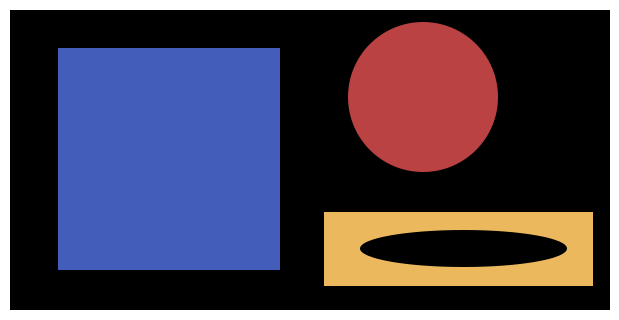

In [2]:
image = cv2.imread("images/basic_shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image)

3
4


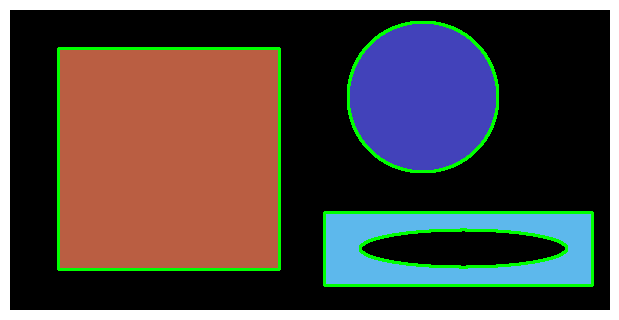

In [10]:
# find contours
contours = cv2.findContours(
    image=gray.copy(), 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)
contours = imutils.grab_contours(contours)
clone = image.copy()
print(len(contours))


# draw contours
cv2.drawContours(
    image=clone, 
    contours=contours, 
    contourIdx=-1, 
    color=(0, 255, 0), 
    thickness=2
)

display(clone, flip=False, cmap="gray")

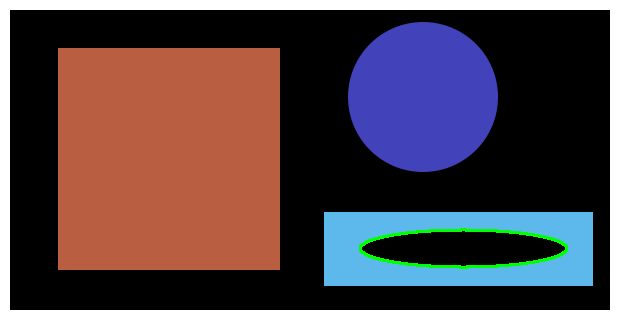

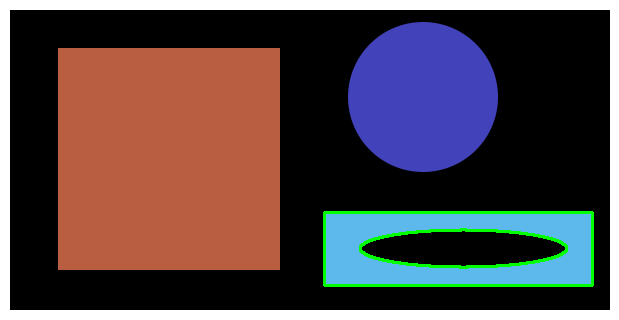

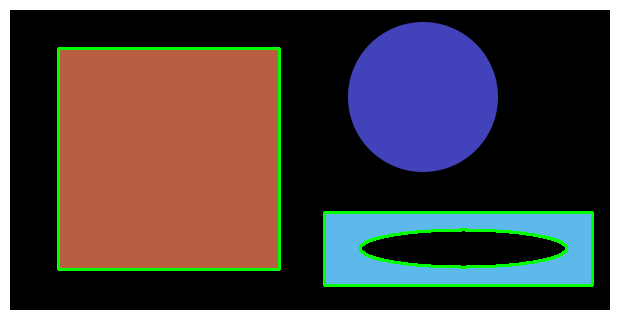

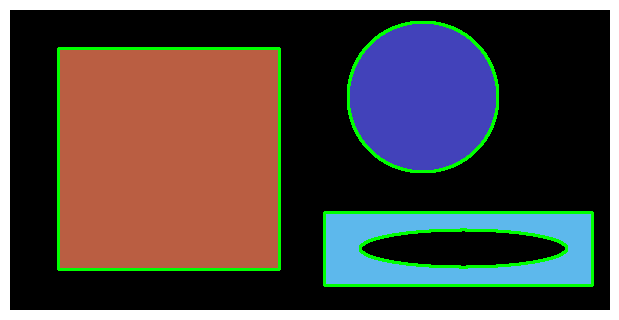

In [17]:
# drawing contours such that it will not draw one for the oval shape inside rectangle 
clone = image.copy()
for i, c in enumerate(contours):
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    display(clone, flip=False, cmap="gray")

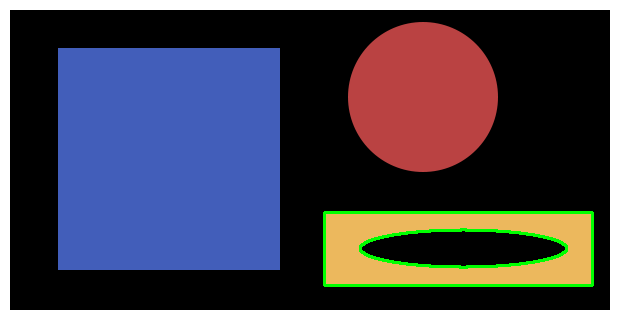

In [36]:
clone = image.copy()

# more pythonic way of doing above
cv2.drawContours(clone, list(contours[:2]), -1, (0, 255, 0), 2)
display(clone)

3


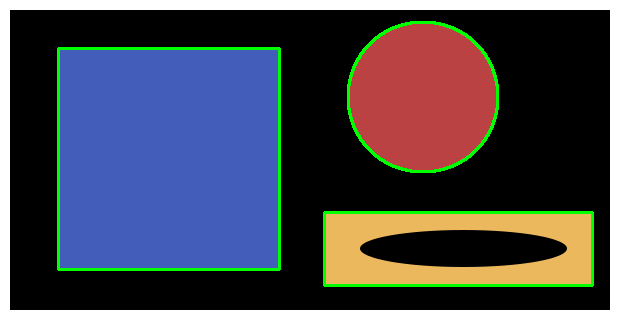

In [40]:
# find contours only for the outer regions of the rectangle

clone = image.copy()

contours = cv2.findContours(image=gray.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print(len(contours))
cv2.drawContours(clone, contours, -1, (0, 255, 0), 2)
display(clone)

### Using Masks and Contours Together

3


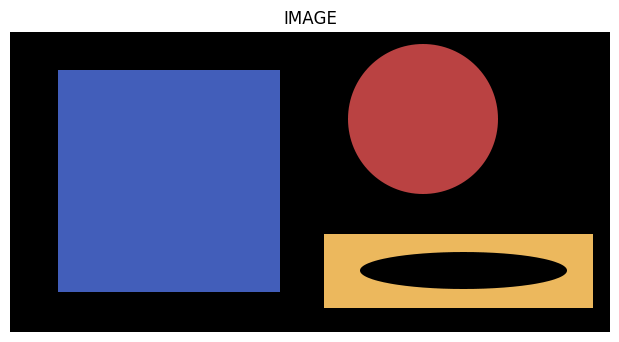

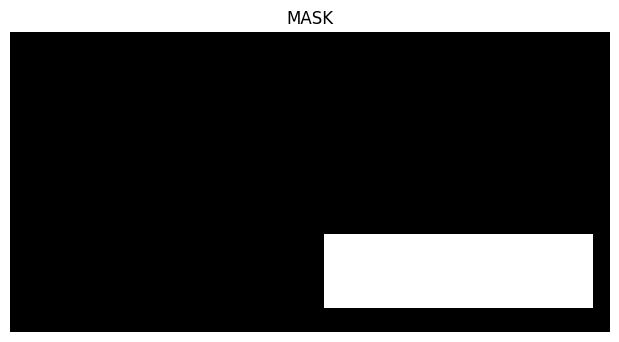

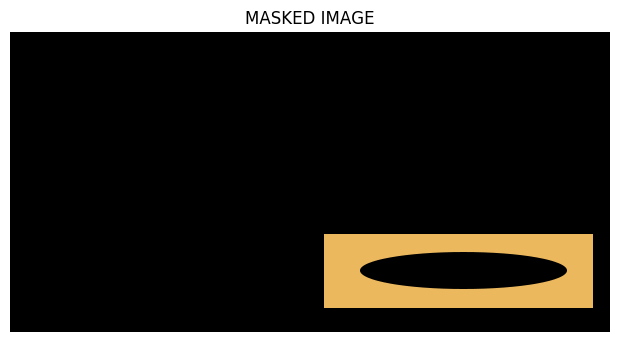

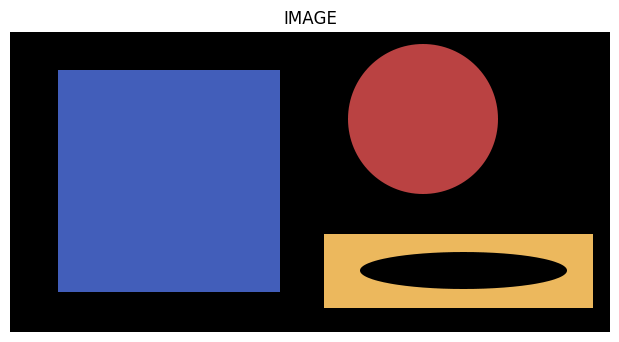

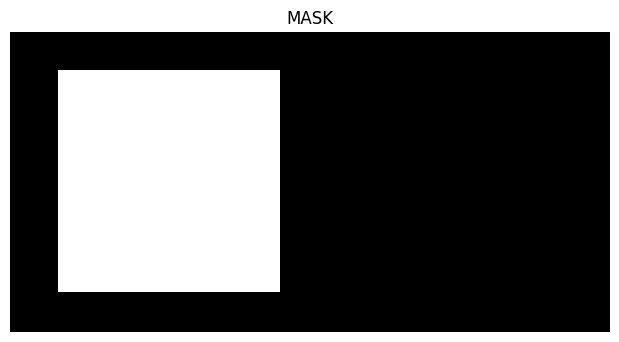

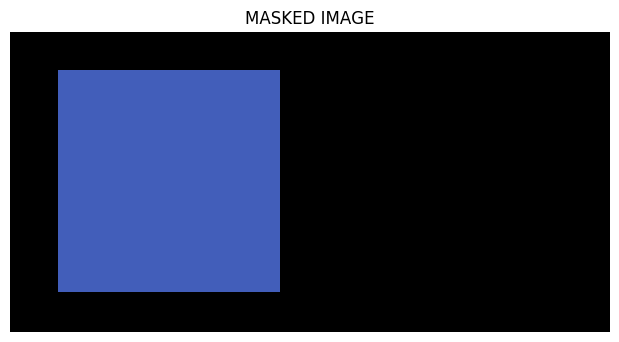

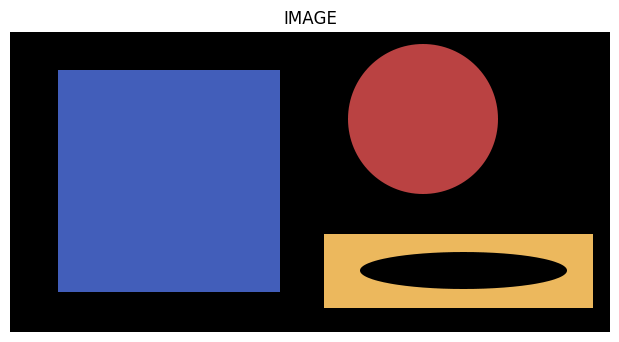

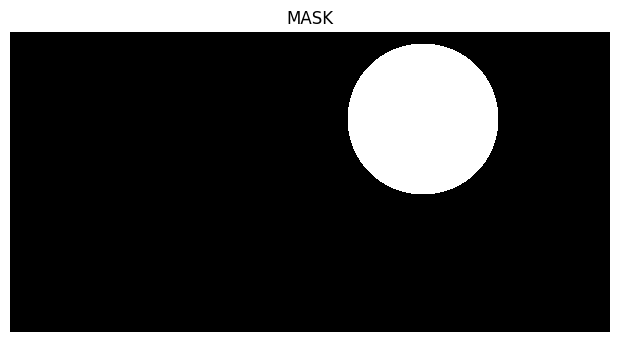

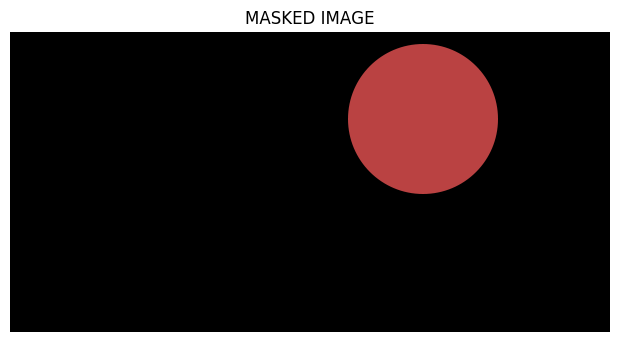

In [45]:
clone = image.copy()

contours = cv2.findContours(image=gray.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print(len(contours))

for c in contours:
    
    # construct mask 
    mask = np.zeros(gray.shape, dtype="uint8")
    
    # draw contours on mask
    cv2.drawContours(
        image=mask, 
        contours=[c], 
        contourIdx=-1,
        color=255, # indicating that we want to draw white
        thickness=-1 # indicating to fill the shape
    )
    
    # show
    display(image, title="IMAGE")
    display(mask, flip=False, cmap="gray", title="MASK")
    
    # masked - image + mask
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    display(masked_image, title="MASKED IMAGE")

### Simple Contour Properties

#### Centroid/Center of Mass

The “centroid” or “center of mass” is the center (x, y)-coordinate of an object in an image. This (x, y)-coordinate is actually calculated based on the *image moments*, which are based on the weighted average of the (x, y)-coordinates/pixel intensity along the contour.


Moments OpenCV - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html 

LearnOpenCv - https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/ 

In [4]:
image = cv2.imread("images/more_shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
# find contours
contours = cv2.findContours(
    image=gray.copy(),
    mode=cv2.RETR_EXTERNAL,
    method=cv2.CHAIN_APPROX_SIMPLE
)
contours = imutils.grab_contours(contours)
print(len(contours))
clone = image.copy()

5


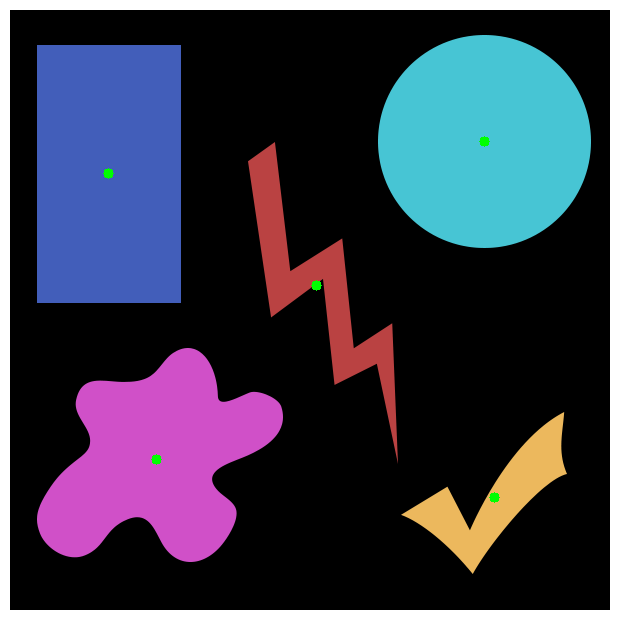

In [10]:
# loop through contours
for c in contours:
    # compute moments of the contour
    M = cv2.moments(c)
    # calculate center of mass from moments
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    
    # draw the center of contour on image
    cv2.circle(clone, (cX, cY), 5, (0, 255, 0), -1)
display(clone)
clone = image.copy()

In [11]:
c = contours[0]

In [12]:
M = cv2.moments(c)

In [13]:
M

{'m00': 8049.5,
 'm10': 3903962.333333333,
 'm01': 3922734.6666666665,
 'm20': 1907158065.0833333,
 'm11': 1893790021.2916665,
 'm02': 1921680020.4166665,
 'm30': 938201455016.0,
 'm21': 920845208946.35,
 'm12': 923650256033.9166,
 'm03': 946168538770.3,
 'mu20': 13758238.996564865,
 'mu11': -8714281.12805581,
 'mu02': 10027462.48531127,
 'mu30': -104842695.58312988,
 'mu21': -110702121.8282404,
 'mu12': 139629153.52789116,
 'mu03': -90357278.99804688,
 'nu20': 0.21233668845835862,
 'nu11': -0.13449116543829018,
 'nu02': 0.1547580455829436,
 'nu30': -0.01803499044883371,
 'nu21': -0.019042926154592285,
 'nu12': 0.02401894033960202,
 'nu03': -0.015543216002303874}

####  Area and Perimeter

The area of the contour is the ***number of pixels that reside inside the contour outline***. Similarly, the perimeter ***(sometimes called arc length) is the length of the contour***.

Contour#: 1, Area: 8049.50, Perimeter: 577.39
Contour#: 2, Area: 30873.00, Perimeter: 893.32
Contour#: 3, Area: 10435.50, Perimeter: 1038.54
Contour#: 4, Area: 36751.00, Perimeter: 800.00
Contour#: 5, Area: 35702.00, Perimeter: 705.07


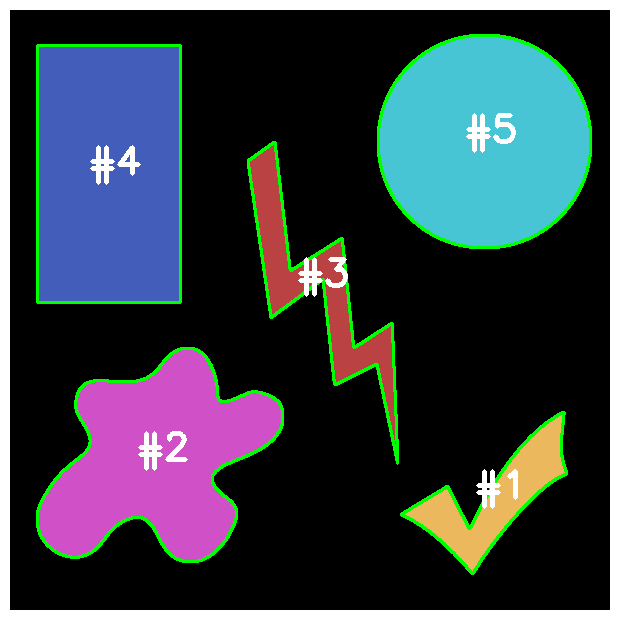

In [14]:
clone = image.copy()

for i, c in enumerate(contours):
    
    # compute the area
    area = cv2.contourArea(c)
    # compute perimeter or arc length
    perimeter = cv2.arcLength(c, True)
    # display
    print("Contour#: {}, Area: {:.2f}, Perimeter: {:.2f}".format(i+1, area, perimeter))
    
    # draw contours
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    
    # compute the center of the contour and draw contour number
    M = cv2.moments(c)
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    
    # draw text in center
    cv2.putText(
        clone, "#{}".format(i+1), (cX-20, cY), cv2.FONT_HERSHEY_SIMPLEX, 
        1.25, (255, 255, 255), 4
    )
display(clone)

#### Bounding Boxes

A bounding box is exactly what it sounds like — an upright rectangle that “bounds” and “contains” the entire contoured region of the image. However, it does not consider the rotation of the shape, so you’ll want to keep that in mind.

A bounding box consists of four components: the starting x-coordinate of the box, then the starting y-coordinate of the box, followed by the width and height of the box.

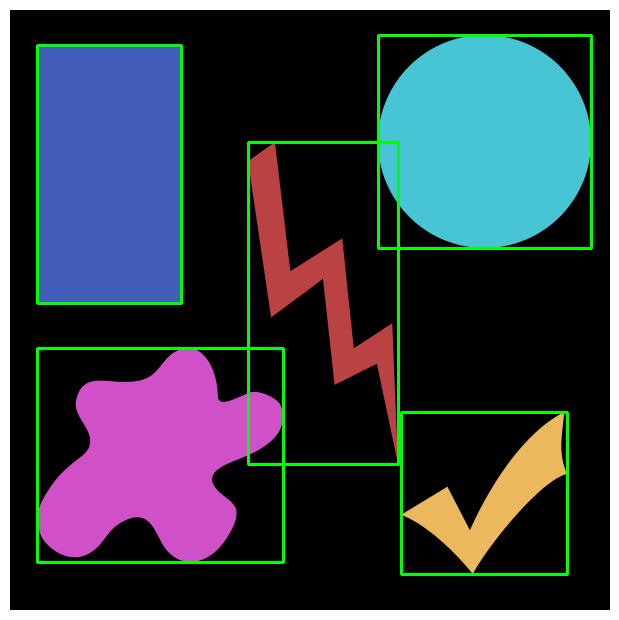

In [15]:
clone = image.copy()

# loop through contours
for c in contours:
    # fit a bounding box
    (x, y, w, h) = cv2.boundingRect(c)
    # draw a rectangle
    cv2.rectangle(clone, (x, y), (x+w, y+h), (0, 255, 0), 2)
display(clone)

#### Rotated Bounding Boxes

cv2.minAreaRect - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=minarearect 

cv2.boxPoints - https://docs.opencv.org/trunk/d3/dc0/group__imgproc__shape.html#gaf78d467e024b4d7936cf9397185d2f5c


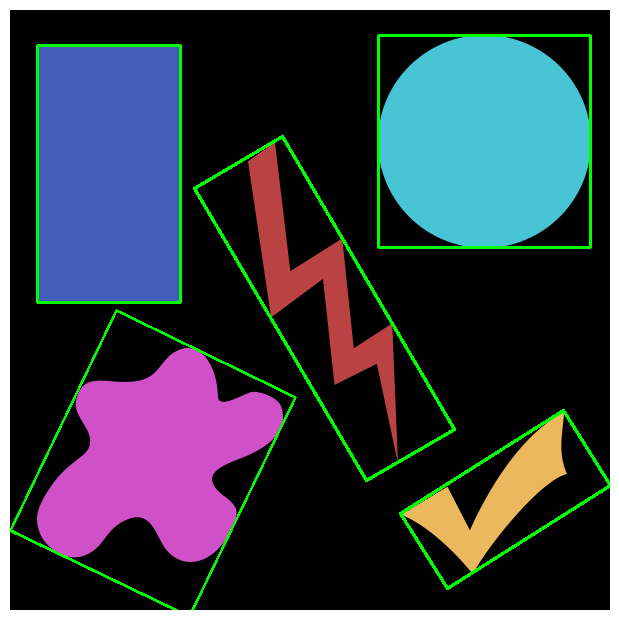

In [21]:
clone = image.copy()
# loop through contours
for c in contours:
    # fit a rotated rectangle 
    # box = ((x, y), (w, h), rotation'theta')
    box = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(box))
    # print("Box: {}".format(box))
    # display(box)
    cv2.drawContours(clone, [box], -1, (0, 255, 0), 2)
    
display(clone)


#### Minimum Enclosing Circles 

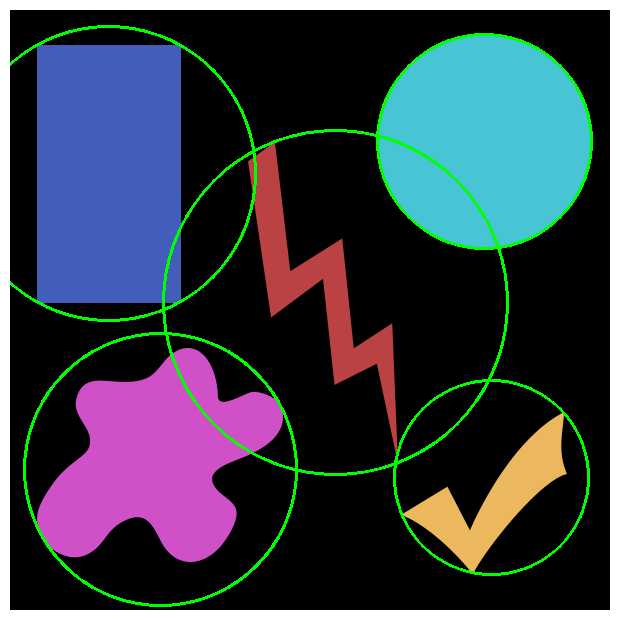

In [23]:
clone = image.copy()

# loop through contours
for c in contours:
    # fit a minimum enclosing circle
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(clone, (int(x), int(y)), int(radius), (0, 255, 0), 2)
display(clone)

In [25]:
image = cv2.imread("images/shapes_example.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [26]:
# find contours
contours = cv2.findContours(
    image=gray.copy(), 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)
contours = imutils.grab_contours(contours)
clone = image.copy()
print(len(contours))

3


In [33]:
# loop through contours
for i, c in enumerate(contours):
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    print(radius)
    cv2.circle(clone, (int(x), int(y)), int(radius), (0, 255, 0), 2)

56.08039855957031
62.831703186035156
77.78184509277344


### Advanced Contour Properties


- Aspect Ratio
    ***aspect ratio = image width / image height***
- Extent
    ***extent = shape area / bounding box area***
- Convex Hull
- Solidity
    ***solidity = contour area / convex hull area***

#### Tic Tac Toe

0 (Contour #1) -- Solidity=0.98
X (Contour #2) -- Solidity=0.60
0 (Contour #3) -- Solidity=0.98
X (Contour #4) -- Solidity=0.60
X (Contour #5) -- Solidity=0.60
0 (Contour #6) -- Solidity=0.98
? (Contour #7) -- Solidity=0.28


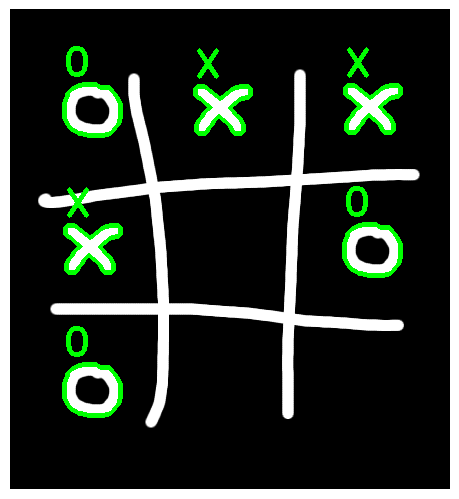

In [35]:
image = cv2.imread("images/contours_tictactoe.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

contours = cv2.findContours(
    gray.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

contours = imutils.grab_contours(contours)

# loop over
for i, c in enumerate(contours):
    # compute contour area
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    
    # compute convex hull
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    solidity = area/hull_area
    
    # initialize charecter text
    char = "?"
    
    # if solidity is high examine 0
    if solidity > 0.9:
        char = "0"
    # reasonably high
    elif solidity > 0.5:
        char = "X"
    
    # if the character is unknown draw it
    if char != "?":
        cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
        cv2.putText(image, char, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 4)
    
    # show contour properties
    print("{} (Contour #{}) -- Solidity={:.2f}".format(char, i+1, solidity))

display(image)

#### Identifying Tetris Blocks

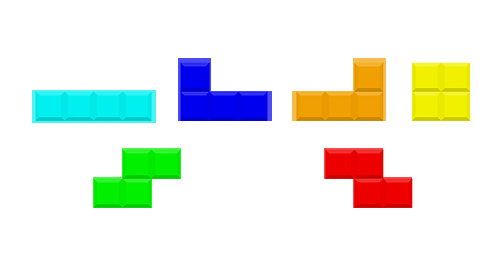

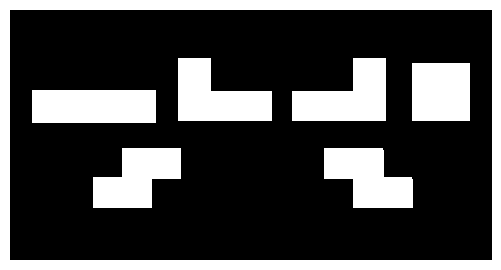

In [17]:
image = cv2.imread("images/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# display(gray, flip=False, cmap="gray")
# threshold the grayscale 
threshold = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)[1]

display(image)
display(threshold, flip=False, cmap="gray")

In [18]:
# find the external contours 
contours = cv2.findContours(threshold.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
# place holder for hull
hull_image = np.zeros(gray.shape[:2], dtype="uint8")
print(len(contours))

6


Contour #1 -- aspect_ratio=1.48, extent=0.66, solidity=0.81
Contour #2 -- aspect_ratio=1.47, extent=0.65, solidity=0.80
Contour #3 -- aspect_ratio=3.76, extent=0.96, solidity=1.00
Contour #4 -- aspect_ratio=1.00, extent=0.97, solidity=1.00
Contour #5 -- aspect_ratio=1.49, extent=0.63, solidity=0.79
Contour #6 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


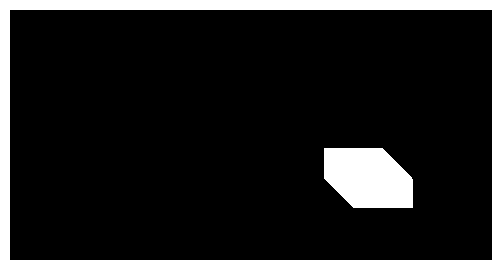

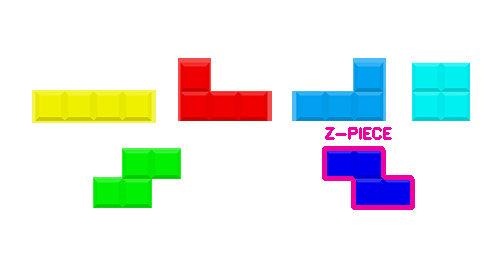

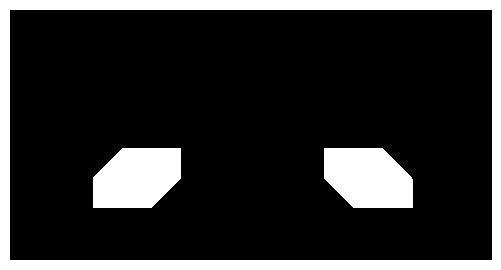

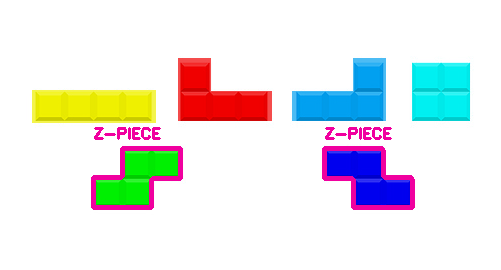

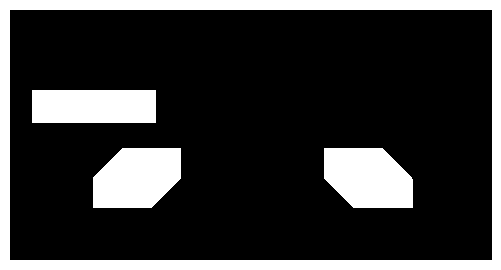

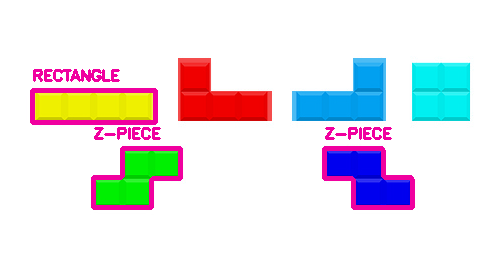

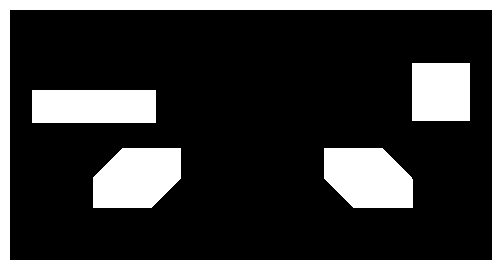

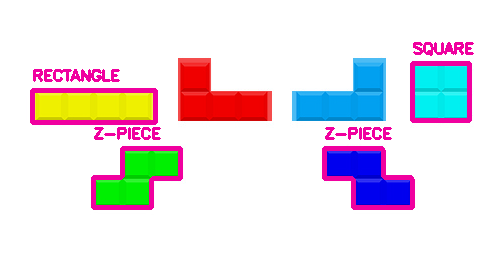

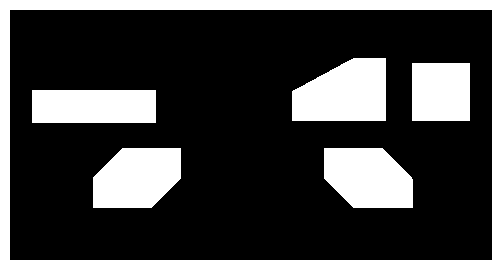

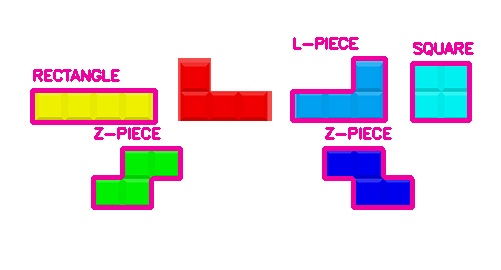

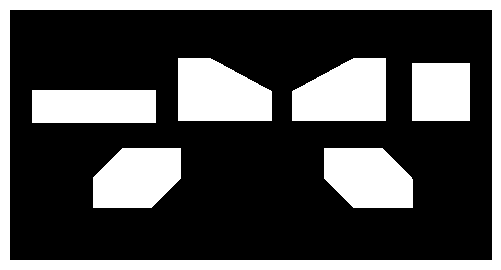

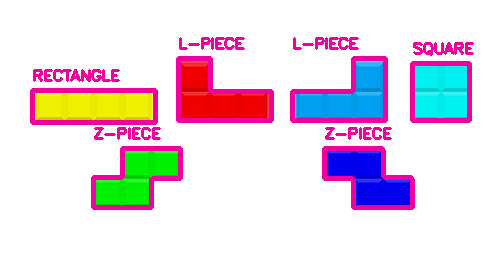

In [19]:
# loop through the contours
for i, c in enumerate(contours):
    # get contour area
    area = cv2.contourArea(c)
    # get dimensions for bounding box
    (x, y, w, h) = cv2.boundingRect(c)
    
    # get aspectratio
    aspect_ratio = w/float(h)
    
    # get extent
    extent = area/float(w*h)
    
    # compute convex hull of contour
    # use that to compute solidity
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    # solidity
    solidity = area/float(hull_area)
    
    # draw contours
    cv2.drawContours(hull_image, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    
    shape = ""
    
    # if aspect ratio is approximately one then it's a SQUARE
    if aspect_ratio >= 0.98 and aspect_ratio <= 1.02:
        shape = "SQUARE"
    
    # if the width is 3x longer than hieght then it's RECTANGLE
    elif aspect_ratio >= 3.0:
        shape = "RECTANGLE"
        
    # if extent is sufficiently small then it's a L
    elif extent < 0.65:
        shape = "L-PIECE"
    
    # if solidity is large then Z
    elif solidity > 0.80:
        shape = "Z-PIECE"
        
    # draw text    
    cv2.putText(image, shape, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (240, 0, 159), 2)
    
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}".format(
        i+1, aspect_ratio, extent, solidity
    ))
    
    display(hull_image, flip=False, cmap="gray")
    display(image, flip=False)

In [26]:
### Quiz

image = cv2.imread("images/more_shapes_example.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# display(gray, flip=False, cmap="gray")
# threshold the grayscale 
# threshold = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)[1]

# display(image)
# display(threshold, flip=False, cmap="gray")


# find the external contours 
contours = cv2.findContours(gray.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print(len(contours))

for i, c in enumerate(contours):

    # compute contour area
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    
    # compute convex hull
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    solidity = area/hull_area
    
    # get aspectratio
    aspect_ratio = w/float(h)

    # get extent
    extent = area/float(w*h)
    print("SOLIDITY- {:.2f}, ASPECT_RATIO- {:.2f}, EXTENT- {:.2f}".format(solidity, aspect_ratio, extent))

3
SOLIDITY- 0.78, ASPECT_RATIO- 2.74, EXTENT- 0.49
SOLIDITY- 0.99, ASPECT_RATIO- 1.00, EXTENT- 0.79
SOLIDITY- 1.00, ASPECT_RATIO- 3.33, EXTENT- 0.98


### Contour Approximation

cv2.approxPolyDP - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#approxpolydp 


LENGTH-16
LENGTH-8
LENGTH-10
LENGTH-12


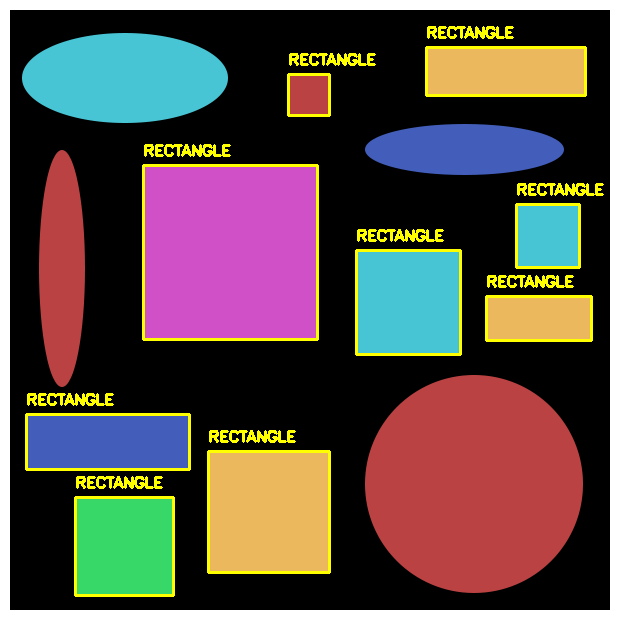

In [30]:
image = cv2.imread("images/contours_circles_and_squares.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find contours
contours = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

# loop over
for i, c in enumerate(contours):
    
    # approximate the contour
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * perimeter, True)
    
    # if approximated contour has four vertices then we examine more
    if len(approx) == 4:
        cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
        (x, y, w, h) = cv2.boundingRect(approx)
        
        cv2.putText(image, "RECTANGLE", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)
    
    else:
        print("LENGTH-{}".format(len(approx)))
display(image)

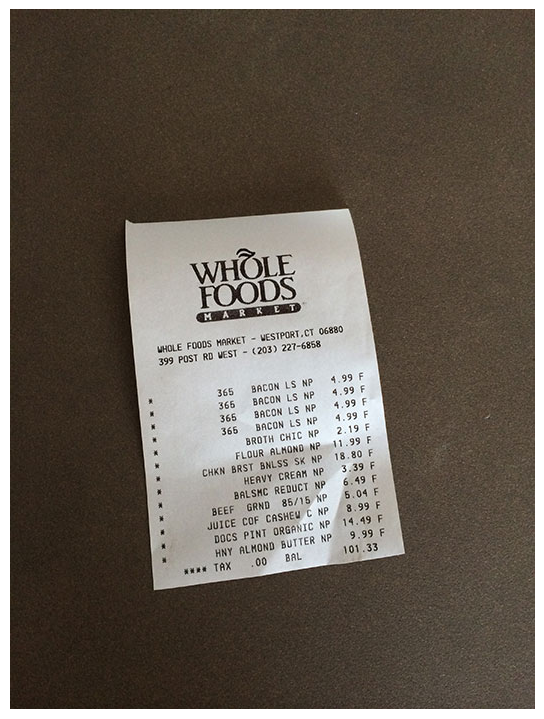

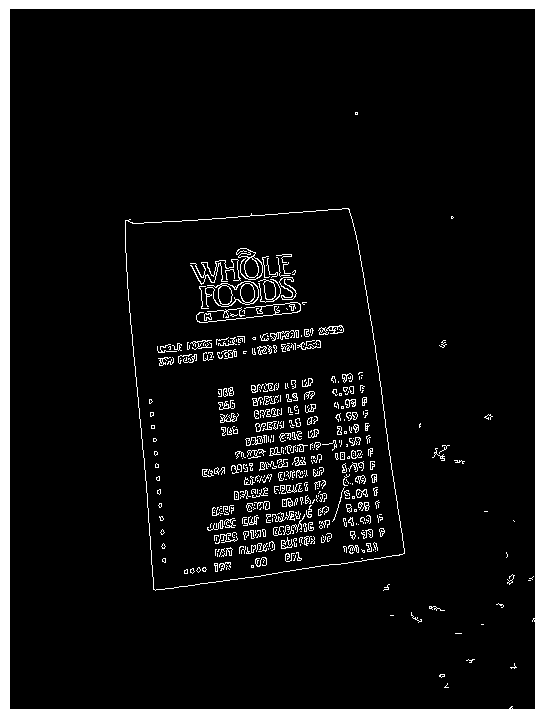

In [31]:
## Example 


image = cv2.imread("images/contours_receipt_original.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 75, 200)

display(image)
display(edged, flip=False, cmap="gray")

ORIGINAL: 287, APPROXIMATED: 4
ORIGINAL: 42, APPROXIMATED: 3
ORIGINAL: 8, APPROXIMATED: 2
ORIGINAL: 27, APPROXIMATED: 2
ORIGINAL: 27, APPROXIMATED: 2
ORIGINAL: 21, APPROXIMATED: 2
ORIGINAL: 4, APPROXIMATED: 1


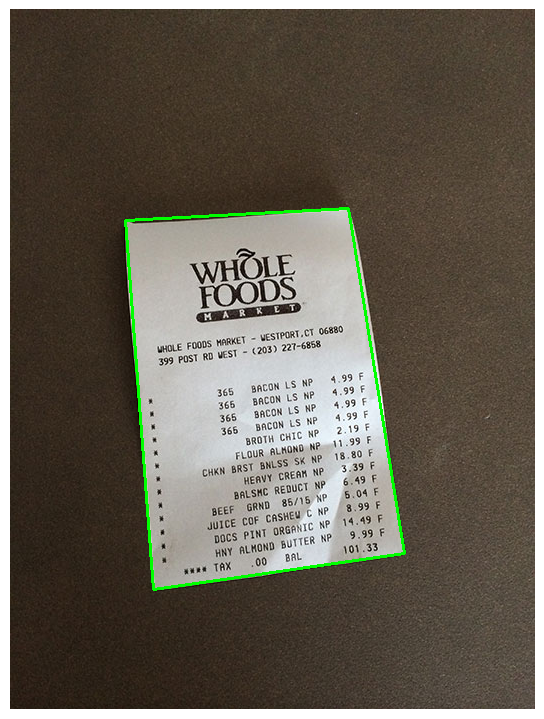

In [33]:
# start finding contours
contours = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
# sort contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:7]

# loop over
for c in contours:
    preimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01*perimeter, True)
    
    print("ORIGINAL: {}, APPROXIMATED: {}".format(len(c), len(approx)))
    
    # if rectangle
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        
display(image)
    

ORIGINAL: 319, APPROXIMATED: 5


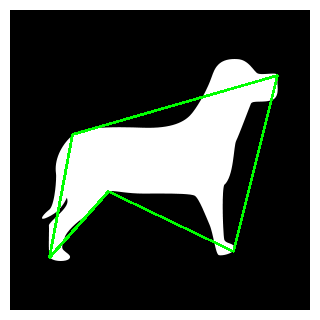

In [60]:
# quiz
## Example 


image = cv2.imread("images/dog_contour.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# start finding contours
contours = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

# loop over
for c in contours:
    preimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.1*perimeter, True)
    
    print("ORIGINAL: {}, APPROXIMATED: {}".format(len(c), len(approx)))
    
    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        
display(image)

### Sorting Contours

In [2]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [3]:

def draw_contour(image, c, i):
    # compute the center of the contour area and draw a circle
    # representing the center
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # draw the countour number on the image
    cv2.putText(image, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.0, (255, 255, 255), 2)

    # return the image with the contour number drawn on it
    return image

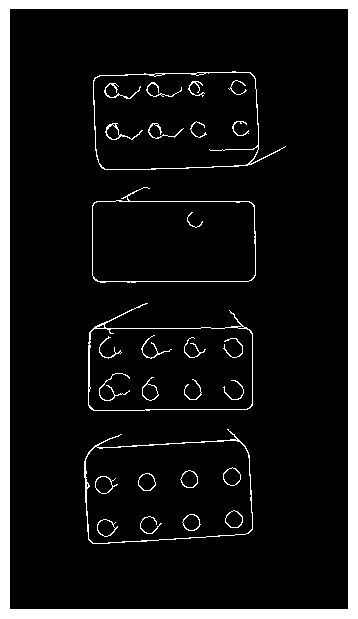

In [4]:
image = cv2.imread("images/lego_blocks_1.png")
accumEdged = np.zeros(image.shape[:2], dtype="uint8")
 
# loop over the blue, green, and red channels, respectively
for chan in cv2.split(image):
    # blur the channel, extract edges from it, and accumulate the set
    # of edges for the image
    chan = cv2.medianBlur(chan, 11)
    edged = cv2.Canny(chan, 50, 200)
    accumEdged = cv2.bitwise_or(accumEdged, edged)
    
# show the accumulated edge map
display(accumEdged, flip=False, cmap="gray")

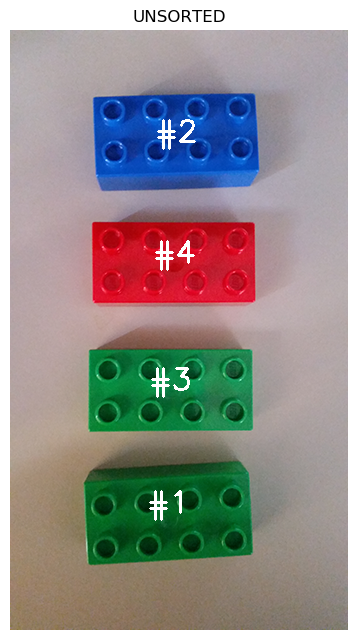

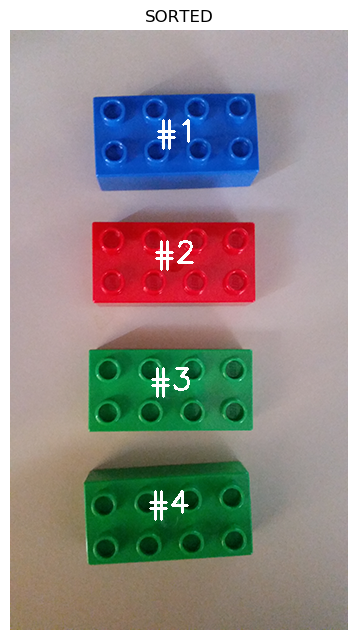

In [5]:
# find contours in the accumulated image, keeping only the largest
# ones
cnts= cv2.findContours(accumEdged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
orig = image.copy()
 
# loop over the (unsorted) contours and draw them
for (i, c) in enumerate(cnts):
    orig = draw_contour(orig, c, i)
    
# show the original, unsorted contour image
display(orig, title="UNSORTED")
 
# sort the contours according to the provided method
(cnts, boundingBoxes) = sort_contours(cnts, method="top-to-bottom")
 
# loop over the (now sorted) contours and draw them
for (i, c) in enumerate(cnts):
    draw_contour(image, c, i)
    
display(image, title="SORTED")